# <p align="center"> PREDICCIÓN DE ACCIONES PARA EL 2018 (PREDICCIÓN VS REAL) 

##  Simulación matemática: Proyecto 3

### <span style="color:red">   INTEGRANTES

#### * <font color="green">Mariana Briones Martínez
#### * <font color="green">Patricia Buenrostro
#### * <font color="green">Marta Martínez Valero
    

![Imagen de proyectil](https://www.cronista.com/__export/1504521214248/sites/diarioelcronista/img/2017/09/04/cc040917f002f09_crop1504521213301.jpg_258117318.jpg)

### OBJETIVO 
#### Comparar las predicciones que realizamos, respecto a ciertas acciones para el año de 2018 y después compararlo con los reales ,para poder ver cuales si siguieron la predicción y cuales no. 
### OBJETIVO SECUNDARIO 
#### Averiguar si la expectativa respecto a la industria aeronaútica (agrupación de todas las acciones que vamos a poner), es a la alza o a la baja y luego compararla con lo que sucedió en realidad y si fue un buen año para la industria aeronaútica o no. 

In [42]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # Explicar
import pandas_datareader.data as web

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [45]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ['GAPB.MX', 'ASURB.MX', 'VOLARA.MX', 'OMAB.MX',"AEROMEX.MX","BA","AENA.MC","AAL.MX","DAL"]
# Fechas: inicios 2011 a finales de 2015
start, end = '2010-01-01', '2017-12-31'

In [46]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(names, start, end)
closes

,GAPB.MX,ASURB.MX,VOLARA.MX,OMAB.MX,AEROMEX.MX,BA,AENA.MC,AAL.MX,DAL
Date,,,,,,,,,
2010-01-04,27.973511,55.307899,NaN,15.082700,NaN,44.707340,NaN,NaN,10.308004
2010-01-05,28.443932,55.533905,NaN,15.041953,NaN,46.171585,NaN,NaN,11.116474
2010-01-06,28.576443,56.796383,NaN,15.116653,NaN,47.572178,NaN,NaN,11.125661
2010-01-07,28.808340,57.061356,NaN,15.300011,NaN,49.497990,NaN,NaN,11.658514
2010-01-08,28.583075,56.656109,NaN,15.435828,NaN,49.020504,NaN,NaN,11.456399
2010-01-11,28.530066,55.042934,NaN,15.245685,NaN,48.439579,NaN,NaN,11.750388
2010-01-12,28.443932,54.170105,NaN,14.819903,NaN,48.089447,NaN,NaN,11.520713
2010-01-13,28.874596,53.694725,NaN,14.593279,NaN,48.670364,NaN,NaN,11.805512
2010-01-14,29.616673,54.107758,NaN,14.332313,NaN,48.988682,NaN,NaN,12.099500


Text(0.5,1,'Gráfica de 2010 a 2017 de las acciones de 9 diferentes compañias asociadas con lo aeronaútico')

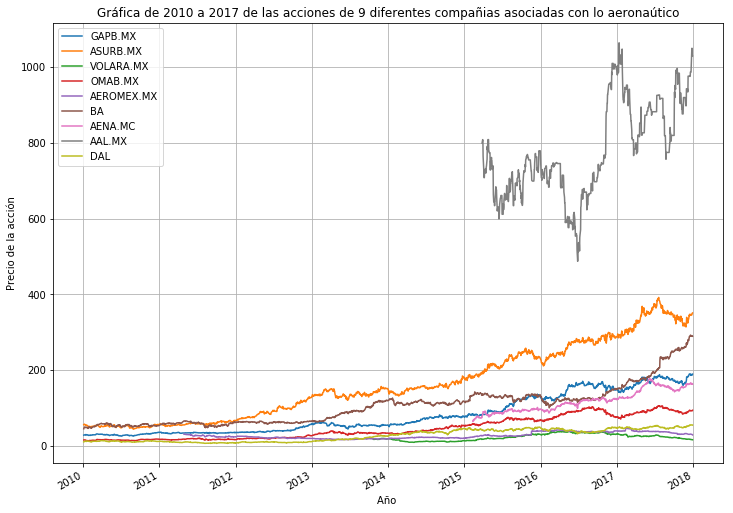

In [47]:
closes.plot(figsize=(12,9));
plt.grid()
plt.xlabel("Año ")
plt.ylabel("Precio de la acción")
plt.title("Gráfica de 2010 a 2017 de las acciones de 9 diferentes compañias asociadas con lo aeronaútico", )

In [105]:
closes.pct_change()

,GAPB.MX,ASURB.MX,VOLARA.MX,OMAB.MX,AEROMEX.MX,BA,AENA.MC,AAL.MX,DAL
Date,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016817,0.004086,NaN,-0.002702,NaN,0.032752,NaN,NaN,0.078431
2010-01-06,0.004659,0.022733,NaN,0.004966,NaN,0.030335,NaN,NaN,0.000826
2010-01-07,0.008115,0.004665,NaN,0.012129,NaN,0.040482,NaN,NaN,0.047894
2010-01-08,-0.007819,-0.007102,NaN,0.008877,NaN,-0.009647,NaN,NaN,-0.017336
2010-01-11,-0.001855,-0.028473,NaN,-0.012318,NaN,-0.011851,NaN,NaN,0.025662
2010-01-12,-0.003019,-0.015857,NaN,-0.027928,NaN,-0.007228,NaN,NaN,-0.019546
2010-01-13,0.015141,-0.008776,NaN,-0.015292,NaN,0.012080,NaN,NaN,0.024721
2010-01-14,0.025700,0.007692,NaN,-0.017883,NaN,0.006540,NaN,NaN,0.024903


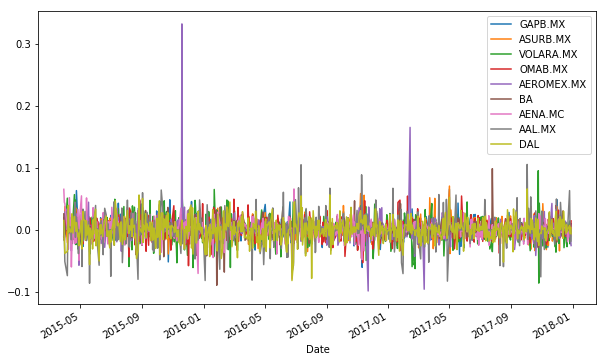

In [98]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [86]:
mu = ret.mean()[0]#[0]ASUR.MX) , ret.std(ASUR.MX)
mu

0.0013025241649632085

In [87]:
std = ret.std()[0]
std

0.014870392725824253

In [88]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [89]:
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")

In [106]:
simcloses0 = closes.iloc[-1]['GAPB.MX']*((1+simret0).cumprod())

In [108]:
closes.iloc[-1]['GAPB.MX']*1.1

207.78304443359377

In [110]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['GAPB.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))

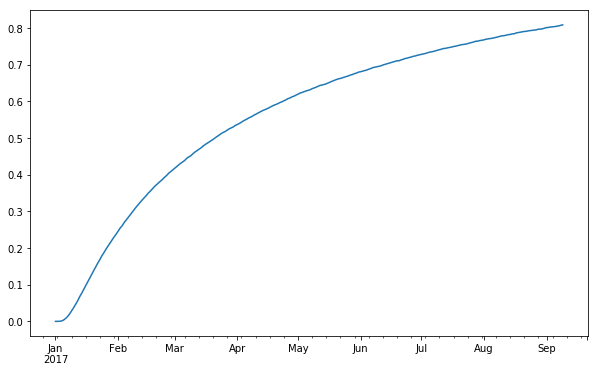

In [112]:
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

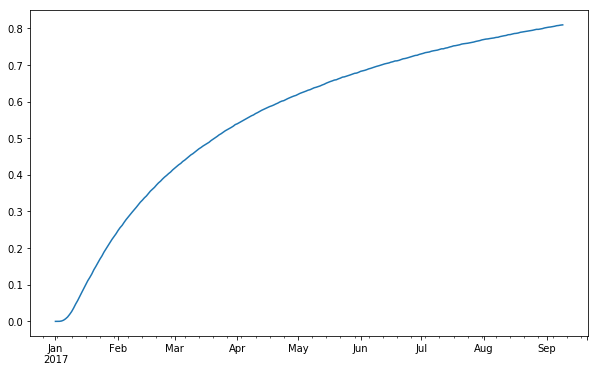

In [113]:
mu = ret.mean()[0]#[0]ASUR.MX) , ret.std(ASUR.MX)
mu
std = ret.std()[0]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['GAPB.MX']*((1+simret0).cumprod())
closes.iloc[-1]['GAPB.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['GAPB.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

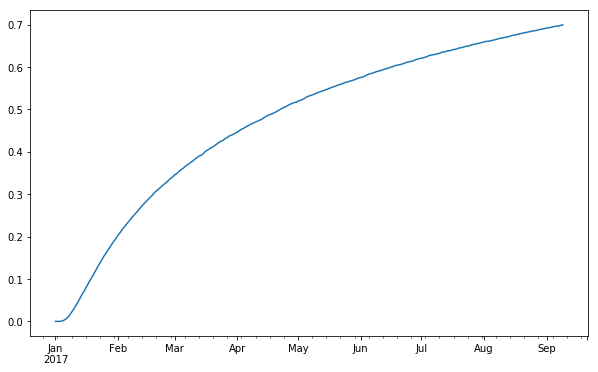

In [114]:
mu = ret.mean()[1]#[0]ASUR.MX) , ret.std(ASUR.MX)
mu
std = ret.std()[1]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['ASURB.MX']*((1+simret0).cumprod())
closes.iloc[-1]['ASURB.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['ASURB.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

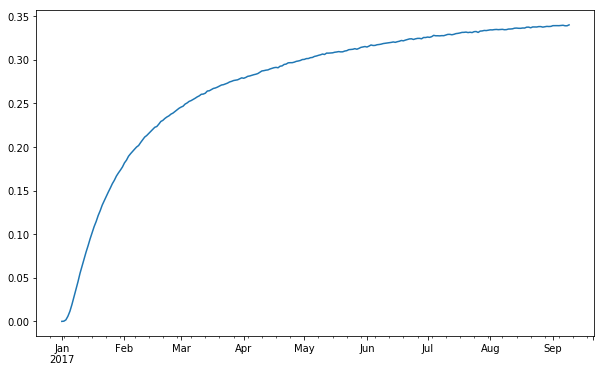

In [115]:
mu = ret.mean()[2]#[0]ASUR.MX) , ret.std(ASUR.MX)
mu
std = ret.std()[2]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['VOLARA.MX']*((1+simret0).cumprod())
closes.iloc[-1]['VOLARA.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['VOLARA.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

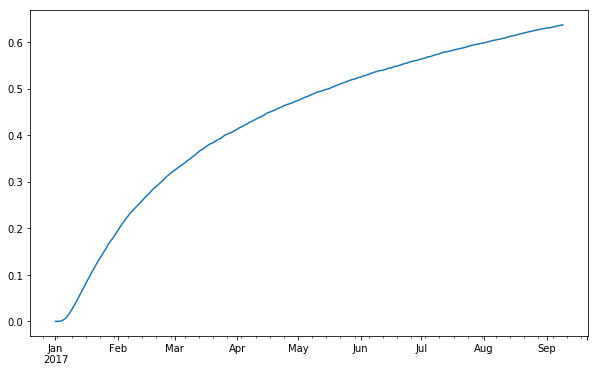

In [116]:
mu = ret.mean()[3]#[0]ASUR.MX) , ret.std(ASUR.MX)
mu
std = ret.std()[3]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['OMAB.MX']*((1+simret0).cumprod())
closes.iloc[-1]['OMAB.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['OMAB.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

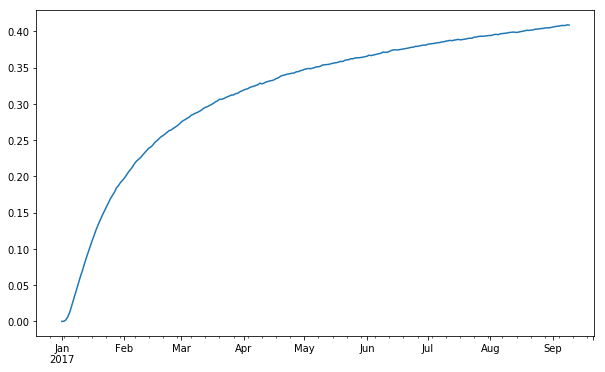

In [117]:
mu = ret.mean()[4]
mu
std = ret.std()[4]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['AEROMEX.MX']*((1+simret0).cumprod())
closes.iloc[-1]['AEROMEX.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['AEROMEX.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

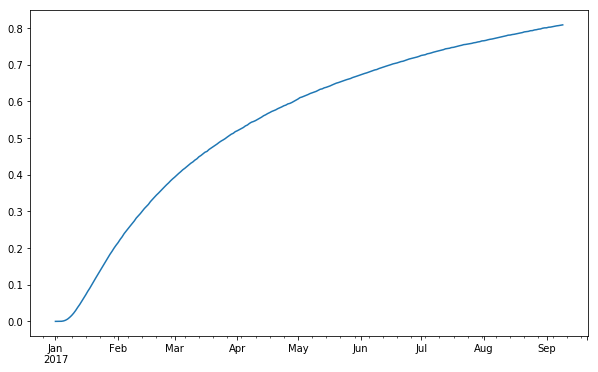

In [118]:
mu = ret.mean()[5]
mu
std = ret.std()[5]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['BA']*((1+simret0).cumprod())
closes.iloc[-1]['BA']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['BA']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

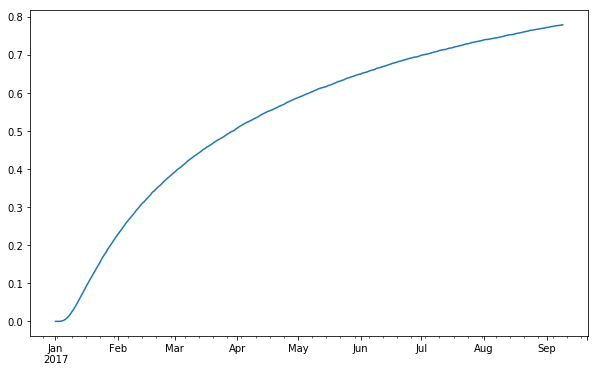

In [119]:
mu = ret.mean()[6]
mu
std = ret.std()[6]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['AENA.MC']*((1+simret0).cumprod())
closes.iloc[-1]['AENA.MC']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['AENA.MC']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

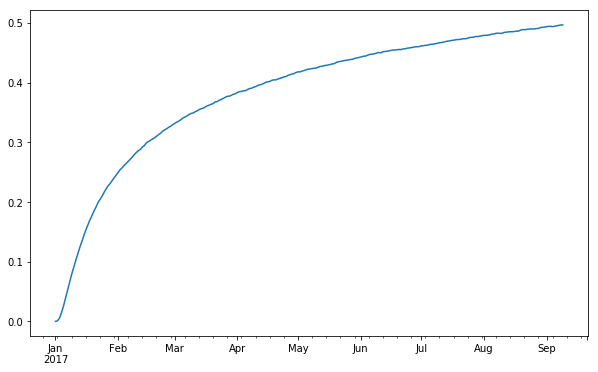

In [120]:
mu = ret.mean()[7]
mu
std = ret.std()[7]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['AAL.MX']*((1+simret0).cumprod())
closes.iloc[-1]['AAL.MX']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['AAL.MX']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

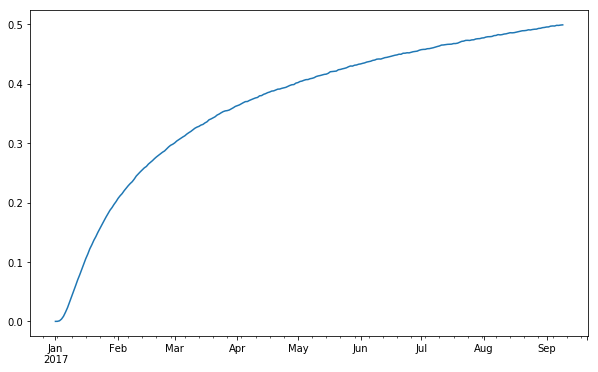

In [121]:
mu = ret.mean()[8]
mu
std = ret.std()[8]
std
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret0 = ret_sim(mu, std, 252, 100000, "2017-01-01")
simcloses0 = closes.iloc[-1]['DAL']*((1+simret0).cumprod())
closes.iloc[-1]['DAL']*1.1
# Umbral de 110% del ultimo precio
K = closes.iloc[-1]['DAL']*1.1
# Fechas
dates = simcloses0.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Comparar cada escenario en cada fecha
TF = simcloses0>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100000)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

## REAL 2018

In [30]:
names = ['GAPB.MX', 'ASURB.MX', 'VOLARA.MX', 'OMAB.MX',"AEROMEX.MX","BA","AENA.MC","AAL.MX","DAL"]
# Fechas: inicios 2011 a finales de 2015
start, end = '2018-01-01', '2018-12-31'

In [31]:
closes = get_closes(names, start, end)
closes

,GAPB.MX,ASURB.MX,VOLARA.MX,OMAB.MX,AEROMEX.MX,BA,AENA.MC,AAL.MX,DAL
Date,,,,,,,,,
2018-01-02,189.949905,363.793030,15.950000,95.733406,29.129999,291.126221,164.125244,1029.474976,55.353500
2018-01-03,191.333252,363.695160,15.980000,96.092621,29.240000,292.067719,165.954208,1006.486633,54.329159
2018-01-04,192.370773,362.295105,16.080000,96.949188,29.700001,290.959503,168.842041,1006.486633,54.329159
2018-01-05,192.632477,360.885284,16.080000,96.092621,29.670000,302.895233,170.719147,994.642639,54.602318
2018-01-08,192.894196,359.955200,15.750000,95.521568,29.690001,304.179993,171.585495,1001.888916,53.343838
2018-01-09,190.613525,360.151001,15.660000,94.057106,29.490000,312.300598,172.451828,1022.478455,52.846298
2018-01-10,185.528778,355.588684,15.120000,92.122910,29.370001,314.095428,168.938309,1025.776855,54.495007
2018-01-11,182.612488,355.471161,15.370000,90.547920,29.170000,321.804108,168.938309,1039.469727,57.090004
2018-01-12,181.817993,351.016510,15.340000,91.017654,29.080000,329.738373,168.168213,1109.833862,58.367996


Text(0.5,1,'Gráfica real de las acciones de 2018 ')

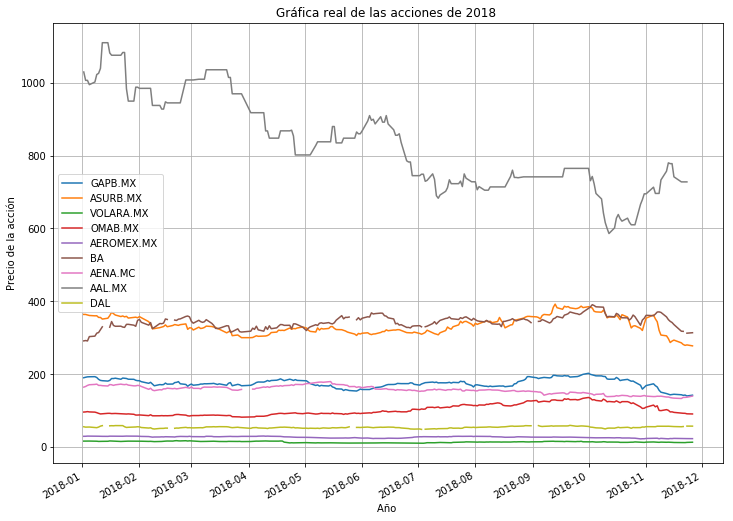

In [34]:
closes.plot(figsize=(12,9));
plt.grid()
plt.xlabel("Año ")
plt.ylabel("Precio de la acción")
plt.title("Gráfica real de las acciones de 2018 ")

# Conclusiones.

1. Se calcularon satisfactoriamente las probabilidades precio-umbral para los activos de las compañías aeronáuticas para el año 2018.
2. se vio el aumento en cada una de las empresas encuestiondel porcentaje para sacar las probabilidades de obtener el10% y los porcentajes de las graficas siempre van en creciento